In [1]:
import pandas as pd
from functools import reduce
from itertools import product

# 1. Load the data
suicide = pd.read_csv("suicide_cleaned.csv")
alcohol = pd.read_csv("alcohol_cleaned.csv")
depression = pd.read_csv("depression_cleaned.csv")
gdp = pd.read_csv("gdp_cleaned.csv")
hdi = pd.read_csv("hdi_cleaned.csv")
life = pd.read_csv("life_cleaned.csv")
unemployment = pd.read_csv("unemployment_cleaned.csv")

# 2. Put them in a dict for easy iteration
datasets = {
    "alcohol": alcohol,
    "depression": depression,
    "gdp": gdp,
    "hdi": hdi,
    "life": life,
    "unemployment": unemployment
}

# 3. Define the full set of years
years = list(range(2000, 2020))

def report_missing(df, name, country_col="country_code", year_col="year"):
    # get unique countries in the dataset
    countries = df[country_col].dropna().unique()
    # build full set of (country, year) pairs
    full = set(product(countries, years))
    # existing pairs
    present = set(zip(df[country_col], df[year_col]))
    # compute the difference
    missing = sorted(full - present)
    if not missing:
        print(f"{name}: no missing country-year entries (complete 2000–2019).")
    else:
        print(f"{name}: {len(missing)} missing entries:")
        # group by country for readability
        from collections import defaultdict
        miss_by_ctry = defaultdict(list)
        for ctry, yr in missing:
            miss_by_ctry[ctry].append(yr)
        for ctry, yrs in miss_by_ctry.items():
            print(f"  - {ctry}: missing years {yrs}")

# 4. Run the report on each
for name, df in datasets.items():
    report_missing(df, name)


alcohol: 14 missing entries:
  - MNE: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2019]
  - SRB: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2019]
depression: no missing country-year entries (complete 2000–2019).
gdp: 49 missing entries:
  - CYM: missing years [2000, 2001, 2002, 2003, 2004, 2005]
  - DJI: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]
  - OWID_KOS: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007]
  - SXM: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]
  - TCA: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
  - VIR: missing years [2000, 2001]
hdi: 125 missing entries:
  - ATG: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2006]
  - BFA: missing years [2000, 2001, 2002, 2003, 2004]
  - BTN: missing years [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
  - CAF: missing years [2009]
  - ERI: missing years [2000, 2001, 2002, 200

In [2]:
import pandas as pd
from functools import reduce

# 1) Load
alcohol      = pd.read_csv("alcohol_cleaned.csv")       # has alcohol_consumption_per_capita
depression   = pd.read_csv("depression_cleaned.csv")    # has depression_rate
gdp          = pd.read_csv("gdp_cleaned.csv")           # has gdp_per_capita
hdi          = pd.read_csv("hdi_cleaned.csv")           # has HDI
life         = pd.read_csv("life_cleaned.csv")          # has life_expectancy
unemployment = pd.read_csv("unemployment_cleaned.csv")  # has unemployment_rate

# 2) Put them in a list
dfs = [alcohol, depression, gdp, hdi, life, unemployment]

# 3) Outer‐merge them one by one on country_code, country_name, year
#    This will keep every country–year that appears in *any* dataset.
base = reduce(
    lambda left, right: pd.merge(
        left, right,
        on=["country_code", "country_name", "year"],
        how="outer"
    ),
    dfs
)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country_code                    9318 non-null   object 
 1   country_name                    9776 non-null   object 
 2   year                            9776 non-null   int64  
 3   alcohol_consumption_per_capita  3786 non-null   float64
 4   depression_rate                 4080 non-null   float64
 5   gdp_per_capita                  7063 non-null   float64
 6   HDI                             3735 non-null   float64
 7   life_expectancy                 5047 non-null   float64
 8   unemployment_rate               4245 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 687.5+ KB


In [4]:
# load the detailed suicide data
suicide = pd.read_csv("suicide_cleaned.csv")  
# suicide has columns country_name, gender, age_group, year, suicide_rate/100k, country_code

# continue from the `base` you built above
# now merge *base* into the detailed suicide table
full_breakdown = pd.merge(
    suicide,
    base,
    on=["country_code", "country_name", "year"],
    how="left"
)

# full_breakdown has columns:
#   country_code, country_name, year, gender, age_group, suicide_rate/100k,
#   alcohol_consumption_per_capita, depression_rate, gdp_per_capita, HDI,
#   life_expectancy, unemployment_rate


# now full_country_year has one row per country–year, and all seven measures
full_breakdown.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212160 entries, 0 to 212159
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   country_name                    212160 non-null  object 
 1   gender                          212160 non-null  object 
 2   age_group                       212160 non-null  object 
 3   year                            212160 non-null  int64  
 4   suicide_rate/100k               212160 non-null  float64
 5   country_code                    212160 non-null  object 
 6   alcohol_consumption_per_capita  193752 non-null  float64
 7   depression_rate                 192400 non-null  float64
 8   gdp_per_capita                  179140 non-null  float64
 9   HDI                             185328 non-null  float64
 10  life_expectancy                 171600 non-null  float64
 11  unemployment_rate               165360 non-null  float64
dtypes: float64(7), i

In [5]:
full_breakdown.isnull().sum()

country_name                          0
gender                                0
age_group                             0
year                                  0
suicide_rate/100k                     0
country_code                          0
alcohol_consumption_per_capita    18408
depression_rate                   19760
gdp_per_capita                    33020
HDI                               26832
life_expectancy                   40560
unemployment_rate                 46800
dtype: int64

In [10]:
clean_df = full_breakdown.dropna()

In [11]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145600 entries, 0 to 212159
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   country_name                    145600 non-null  object 
 1   gender                          145600 non-null  object 
 2   age_group                       145600 non-null  object 
 3   year                            145600 non-null  int64  
 4   suicide_rate/100k               145600 non-null  float64
 5   country_code                    145600 non-null  object 
 6   alcohol_consumption_per_capita  145600 non-null  float64
 7   depression_rate                 145600 non-null  float64
 8   gdp_per_capita                  145600 non-null  float64
 9   HDI                             145600 non-null  float64
 10  life_expectancy                 145600 non-null  float64
 11  unemployment_rate               145600 non-null  float64
dtypes: float64(7), int64(

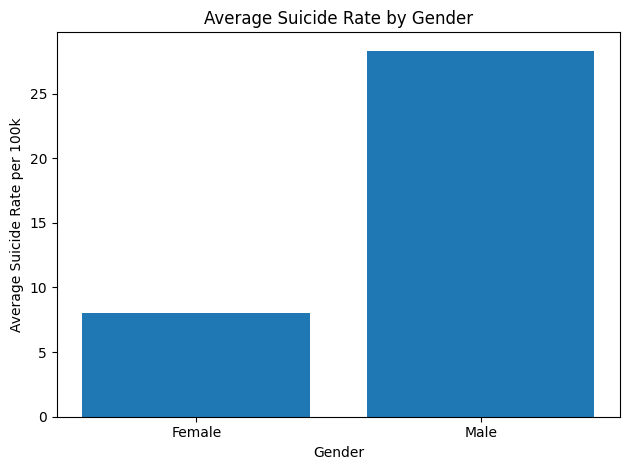

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean suicide rate by gender
grouped = clean_df.groupby('gender')['suicide_rate/100k'].mean().reset_index()

# Plot bar chart
plt.figure()
plt.bar(grouped['gender'], grouped['suicide_rate/100k'])
plt.xlabel('Gender')
plt.ylabel('Average Suicide Rate per 100k')
plt.title('Average Suicide Rate by Gender')
plt.tight_layout()
plt.show()


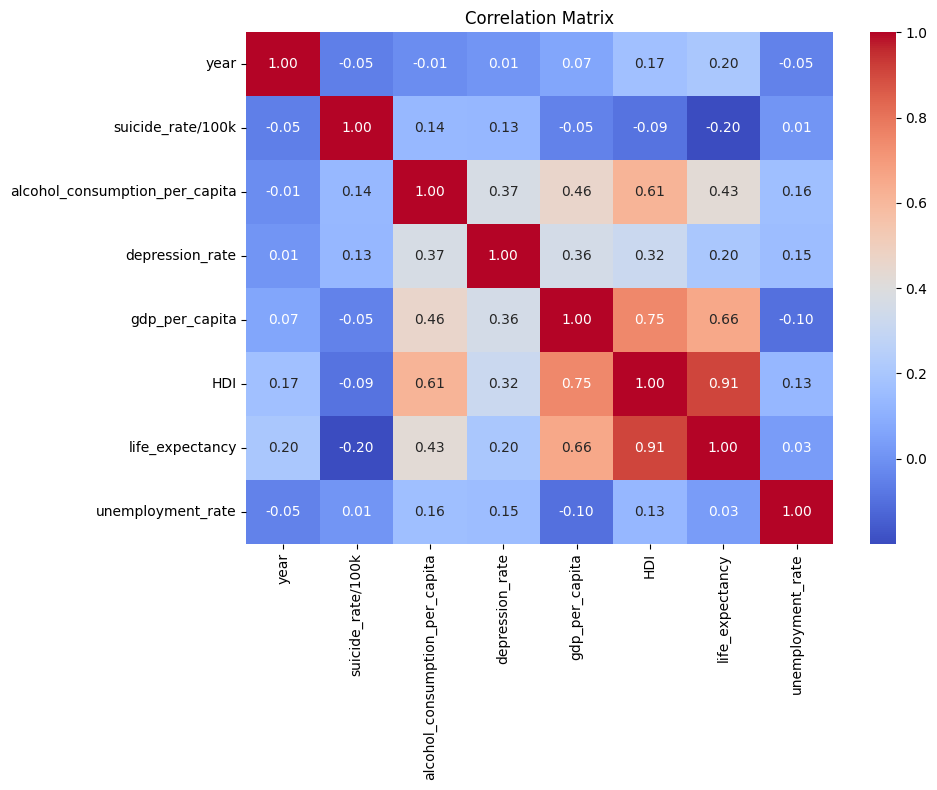

                                    year  suicide_rate/100k  alcohol_consumption_per_capita  depression_rate  gdp_per_capita       HDI  life_expectancy  unemployment_rate
year                            1.000000          -0.054831                       -0.013118         0.010725        0.066785  0.166482         0.199929          -0.046052
suicide_rate/100k              -0.054831           1.000000                        0.136477         0.129517       -0.046365 -0.089448        -0.199165           0.009923
alcohol_consumption_per_capita -0.013118           0.136477                        1.000000         0.371169        0.457045  0.611576         0.426713           0.164691
depression_rate                 0.010725           0.129517                        0.371169         1.000000        0.357476  0.320054         0.200165           0.153615
gdp_per_capita                  0.066785          -0.046365                        0.457045         0.357476        1.000000  0.751551         0.

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(clean_df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


# Compute the correlation matrix
corr_matrix = clean_df.corr(numeric_only=True)

# Print it as plain text
print(corr_matrix.to_string())

In [17]:
clean_df.to_csv('clean_data.csv', index=False)